###Importing libraries
* Numpy - for array manipulation
* Matplotlib - for creating plots
* Pandas - to read from a database (.csv file)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import pandas as pd

###Extracting datasets from google drive URLs
Train and test dataset for team 6 is extracted from dataset folders.
Uncomment the lines for respective dataset

In [ ]:
#Dataset 2
# url_train = 'https://drive.google.com/file/d/1DjqPrB7JgayDHFAAYpTdyUPYZaUt-RR8/view?usp=sharing'
# path_train = 'https://drive.google.com/uc?export=download&id='+url_train.split('/')[-2]
# dataset_train = pd.read_csv(path_train)
# url_test = 'https://drive.google.com/file/d/1hUidha9yV44-f3wvdDZY7_Ter-0X6051/view?usp=sharing'
# path_test = 'https://drive.google.com/uc?export=download&id='+url_test.split('/')[-2]
# dataset_test = pd.read_csv(path_test)
#Datset 3
url_train = 'https://drive.google.com/file/d/1QXB-aoweBMZQGfVAzFBnyWGF1Sl42iUd/view?usp=sharing'
path_train = 'https://drive.google.com/uc?export=download&id='+url_train.split('/')[-2]
dataset_train = pd.read_csv(path_train)
url_test = 'https://drive.google.com/file/d/1vU3q3JUqcZ641pJqpV-hc_aaohY1r3WX/view?usp=sharing'
path_test = 'https://drive.google.com/uc?export=download&id='+url_test.split('/')[-2]
dataset_test = pd.read_csv(path_test)

Plotting training data using X and Y coordinates

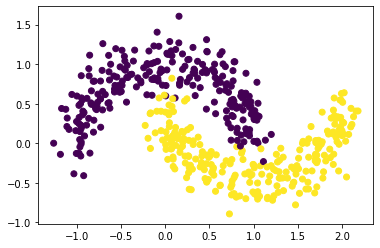

In [ ]:
data_train = dataset_train.to_numpy()
X = data_train[:,0]
Y = data_train[:,1]
label = data_train[:,2]
points = data_train[:,[0,1,2]]
plt.scatter(X,Y,c=label)

In [ ]:
#Dividing train data in 80% training and 20% testing to get the best k
points_trainset = list()
points_testset = list()
n = int(0.8*len(points))
points_trainset = points[0:n]
points_testset = points[-(len(points)-n):]

###Programming kNN Classifier
In order to modularise the code and to simplify it, we build three functions:
* To calculate Eucliedean Distance between points
* To find the nearset neighbours of any point in the dataset
* To classify the point based on its nearest neighbours (majority)

In [ ]:
#Euclidean distance is length of the line segment between two points
def euclidean_dist(point1,point2):
  dist = 0.0
  for i in range(2):
    dist += (point1[i]-point2[i])**2
  return(sqrt(dist))

In [ ]:
#Sort euclidean distances in ascending order and return array for first 'num_neighbours' neighbours
def nearest_neighbours(dataset, point, num_neighbours):
  distances = list()
  for row in dataset:
    dist = euclidean_dist(point, row)
    distances.append((row,dist))
  distances.sort(key=lambda tup: tup[1])
  neighbour = list()
  for i in range(num_neighbours):
    neighbour.append(distances[i][0])
  return neighbour

In [ ]:
#Classifies the point based on the majority of the classes of its nearest neighbours
def class_prediction(dataset, point, num_neighbours):
  neighbours = nearest_neighbours(dataset, point, num_neighbours)
  output_class = [point[-1] for point in neighbours]
  prediction = max(set(output_class), key=output_class.count)
  return prediction

**Supporting Functions:**
* Making an array of all the predicted values of points, given a dataset
* Calculating the accuracy of classifier by comparing predicted values with the given true values
* Plotting accuracy vs k for a set of points and a dataset

In [ ]:
def predicted_values(dataset,test_points,k):
  prediction_set = list()
  for data in test_points:
    prediction_set.append(class_prediction(dataset,data,k))
  return prediction_set

In [ ]:
def classifier_accuracy(class_true,class_predict):
  correct = 0
  incorrect = 0
  for i in range(len(class_predict)):
    if class_true[i]==class_predict[i]:
      correct +=1
    else:
      incorrect +=1
  accuracy = correct*100/(incorrect+correct)
  return accuracy

In [ ]:
def accuracy_plot(dataset,test_points,class_true):
  accuracy = list()
  k = np.arange(start=1, stop=50, step=2)
  max_accuracy = 0
  min_k = 1
  for i in k:
    current_accuracy = classifier_accuracy(class_true,predicted_values(dataset,test_points,i))
    accuracy.append(current_accuracy)
    if max_accuracy<current_accuracy:
      max_accuracy = current_accuracy
      min_k = i
  plt.plot(k,accuracy)
  plt.title('Accuracy vs k')
  plt.xlabel('No. of nearest neighbours (k)')
  plt.ylabel('Accuracy (%)')
  plt.show()
  print("To get maximum accuracy we need ",min_k," nearest neighbours")
  return(min_k)

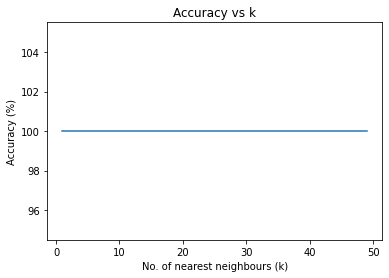

To get maximum accuracy we need  1  nearest neighbours


In [ ]:
#Testing the Classifier using testset of train data with the train data
# plt.scatter(points_trainset[:,0],points_trainset[:,1],c=points_trainset[:,2])
# plt.scatter(points_testset[:,0],points_testset[:,1],c=points_testset[:,2])
best_k = accuracy_plot(points_trainset,points_testset,points_testset[:,2])

In [ ]:
#Accuracy of validation data for best_k
prediction_testset = predicted_values(points_trainset,points_testset,best_k)
print(classifier_accuracy(points_testset[:,2],prediction_testset))

100.0


In [ ]:
#Accuracy of train data for best_k
prediction_trainset = predicted_values(points_trainset,points_trainset,best_k)
print(classifier_accuracy(points_trainset[:,2],prediction_trainset))

100.0


###Testing the Classifier

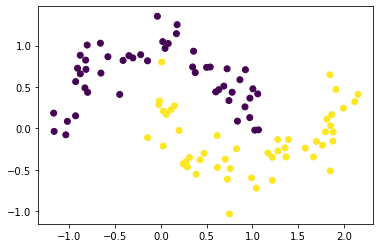

In [ ]:
#Visualising test data before it runs through classifier
test_data = dataset_test.to_numpy()
X_test = test_data[:,0]
Y_test = test_data[:,1]
label_test = test_data[:,2]
plt.scatter(X_test,Y_test,c=label_test)
plt.show()

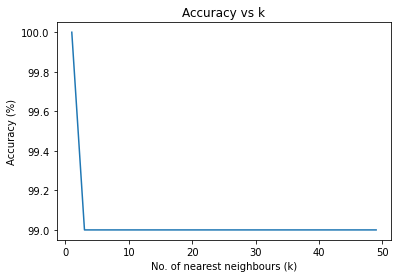

To get maximum accuracy we need  1  nearest neighbours


In [ ]:
k_test = accuracy_plot(points,test_data,label_test)

In [ ]:
#Accuracy of test data for best_k
label_pred = predicted_values(points,test_data,best_k)
print(classifier_accuracy(label_test,label_pred))

100.0


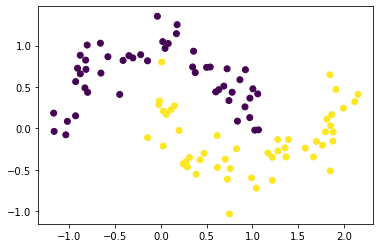

In [ ]:
#Displaying test data predictions for maximum accuracy
k_needed = best_k
label_pred = predicted_values(points,test_data,k_needed)
plt.scatter(X_test,Y_test,c=label_pred)
plt.show()

###Classification Boundary

In [ ]:
x_min, x_max = np.round(X.min())-0.5, np.round(X.max()+0.5)
y_min, y_max = np.round(Y.min())-0.5, np.round(Y.max()+0.5)
x_axis_range = np.arange(x_min,x_max, 0.2)
y_axis_range = np.arange(y_min,y_max, 0.2)
xx, yy = np.meshgrid(x_axis_range, y_axis_range)
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_predict = predicted_values(points,mesh_points,k_needed)

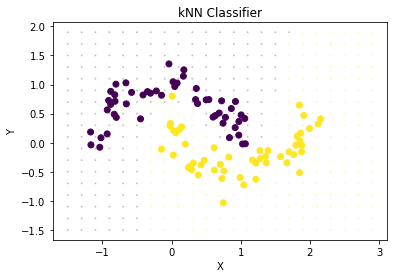

In [ ]:
#Plotting test data over mesh grid
plt.scatter(mesh_points[:,0],mesh_points[:,1], c=mesh_predict, s=1, alpha = 0.2)
plt.scatter(X_test,Y_test,c=label_test, label = ['X','Y'])
plt.title('kNN Classifier')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

###Confusion Matrix

In [ ]:
def confusion_matrix(true_labels, predicted_labels):
  matrix_dim = len(np.unique(true_labels))
  confusion_matrix = np.zeros((matrix_dim,matrix_dim))
  for i in range(len(predicted_labels)):
    a = int(predicted_labels[i])
    b = int(true_labels[i])
    confusion_matrix[a,b] = confusion_matrix[a,b]+1
  print(confusion_matrix)

In [ ]:
#For validation data
label_pred_train = predicted_values(points_trainset,points_testset,k_needed)
label_testset = points_testset[:,2]
confusion_matrix(label_testset, label_pred_train)

[[49.  0.]
 [ 0. 51.]]


In [ ]:
#For train data
label_pred_train = predicted_values(points_trainset,points_trainset,k_needed)
label_testset = points_trainset[:,2]
confusion_matrix(label_testset, label_pred_train)

[[201.   0.]
 [  0. 199.]]


In [ ]:
#For test data
confusion_matrix(label_test,label_pred)

[[34.  0.  0.]
 [ 0. 33.  0.]
 [ 0.  0. 33.]]


#Resources Used
* https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
* https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib
*https://hands-on.cloud/implementing-knn-algorithm-using-python/

